> https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

> https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

In [ ]:
X, y = make_blobs(n_samples= 300, centers= 4, random_state= 42)

wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


In [ ]:
kmeans.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 11,
 'n_init': 'auto',
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

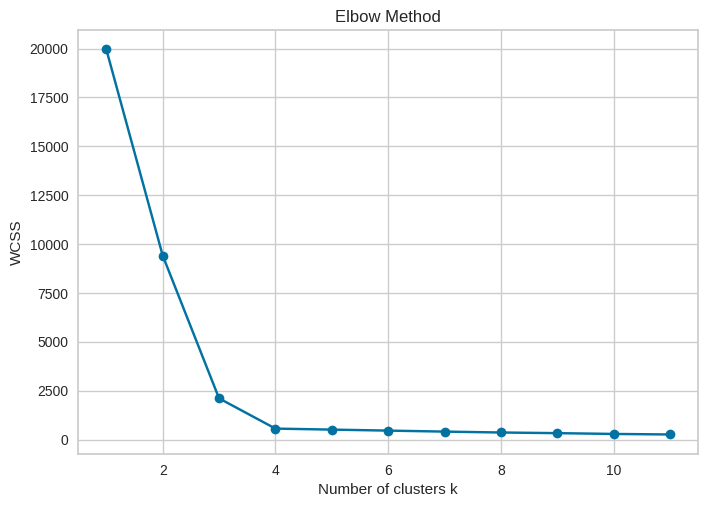

In [ ]:
plt.plot(range(1, 12), wcss, marker ='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters k')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

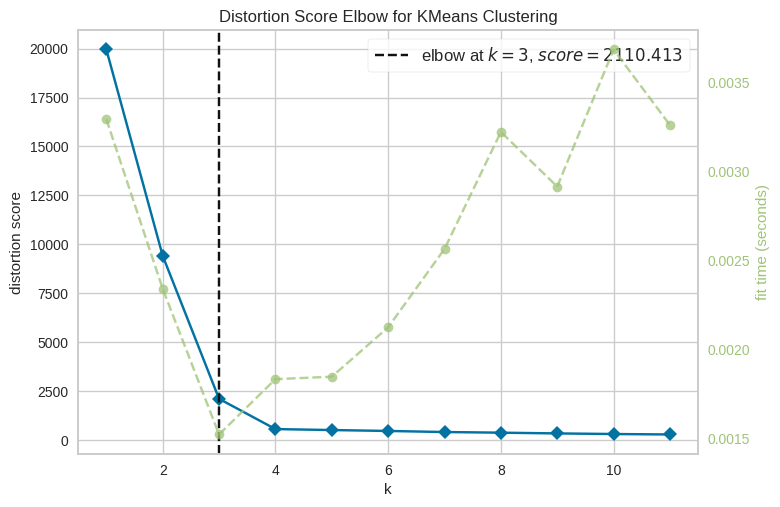

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, metric= 'distortion', k = (1, 12)) #default
visualizer.fit(X)
visualizer.show()

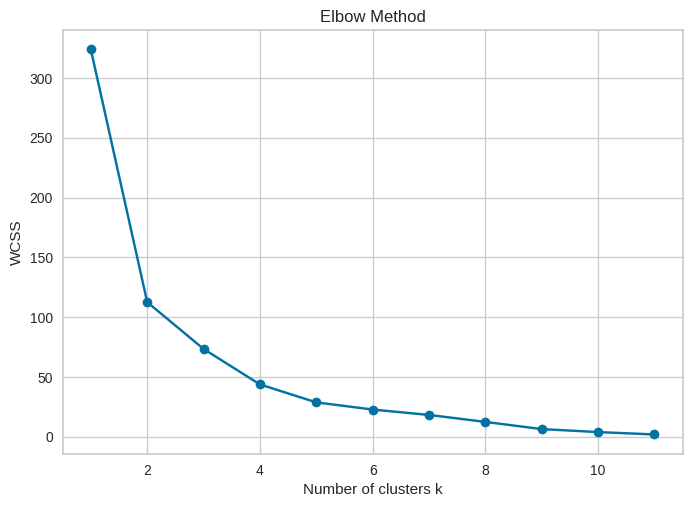

In [ ]:
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0], [12, 3],
            [15, 6], [15, 3], [9, 6], [6, 2], [7, 5]])   #min. #sample= 11

wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 12), wcss, marker ='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters k')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

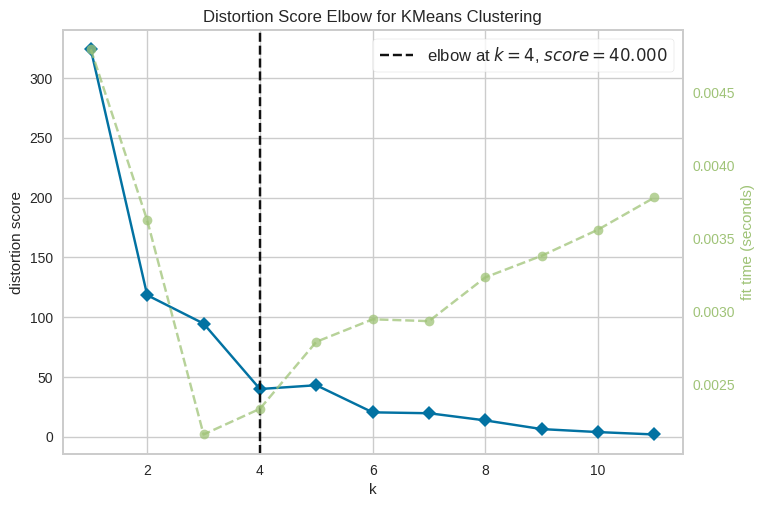

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, metric= 'distortion', k = (1, 12)) #default
visualizer.fit(X)
visualizer.show()

>> Distortion computes the sum of squared distances from each point to its assigned center, turns out it equals WCSS.

In [2]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score
#from sklearn.datasets import make_blobs
#from sklearn.metrics import pairwise_distances

In [3]:
X, y = datasets.load_iris(return_X_y = True)
kmeans = KMeans(n_clusters = 3, random_state = 1).fit(X)
labels = kmeans.labels_

In [4]:
print("DB score:", round(davies_bouldin_score(X, labels), 4))
print("CH score:", round(calinski_harabasz_score(X, labels), 4))
print("Silhouette score:", round(silhouette_score(X, labels, metric = 'euclidean'), 4))

DB score: 0.666
CH score: 561.5937
Silhouette score: 0.5512


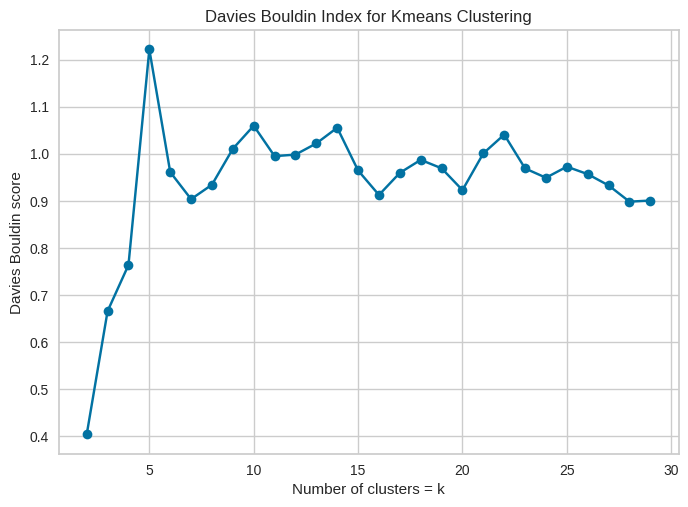

In [5]:
results = {}
for i in range(2, 30):
    kmeans = KMeans(n_clusters = i, random_state = 1)
    labels = kmeans.fit_predict(X)
    db_index = davies_bouldin_score(X, labels)
    results.update({i: db_index})

plt.plot(list(results.keys()), list(results.values()), marker = 'o')
plt.xlabel("Number of clusters = k")
plt.ylabel("Davies Bouldin score")
plt.title('Davies Bouldin Index for Kmeans Clustering')
plt.grid(True)
plt.show()


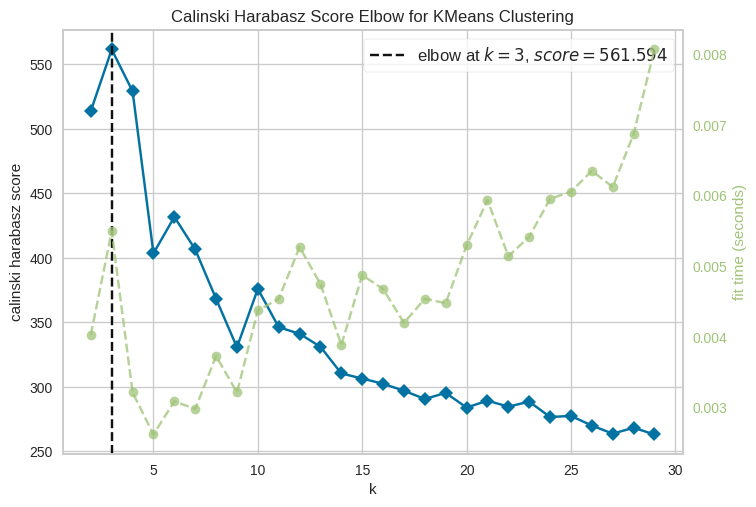

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [6]:
model = KMeans(random_state = 1)

visualizer1 = KElbowVisualizer(model, k = (2, 30), metric = 'calinski_harabasz', timings = True)
visualizer1.fit(X)
visualizer1.show()

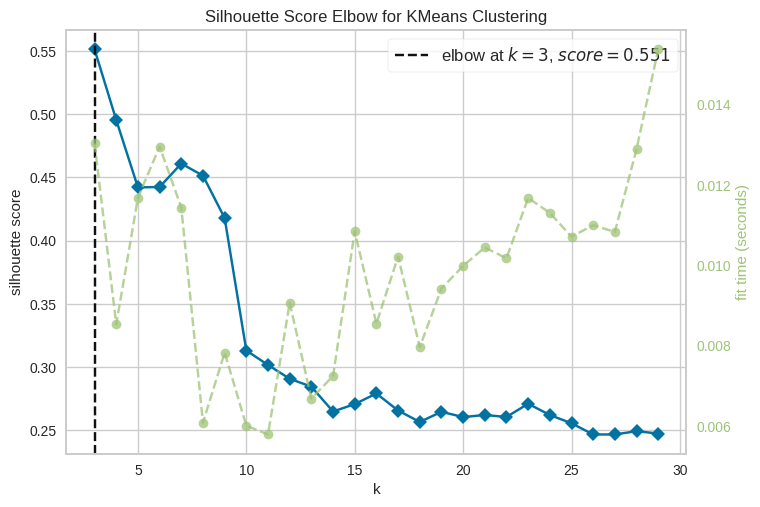

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [7]:
visualizer2 = KElbowVisualizer(model, k = (3, 30), metric = 'silhouette', timings = True)
visualizer2.fit(X)
visualizer2.show()